#1

##1A

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras as ktf
import seaborn as sns

In [ ]:
data = pd.read_excel(R'/content/drive/MyDrive/AI-ML/Neural Networks/Mini Project/Data/Signal.xlsx')
data.shape

(1599, 12)

In [ ]:
data.head()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.shape

(1599, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data['Signal_Strength'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Signal_Strength, dtype: int64

##1B

In [ ]:
(data.isnull().sum()/data.shape[0])*100

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

##1C

In [ ]:
data.shape

(1599, 12)

In [ ]:
data.duplicated().sum()

240

In [ ]:
df=data.mask(data.duplicated() == True,pd.NA)
df.isnull().sum()

Parameter 1        240
Parameter 2        240
Parameter 3        240
Parameter 4        240
Parameter 5        240
Parameter 6        240
Parameter 7        240
Parameter 8        240
Parameter 9        240
Parameter 10       240
Parameter 11       240
Signal_Strength    240
dtype: int64

In [ ]:
for cols in df.columns:
    df[cols].fillna(df[cols].median(),inplace = True)
df.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

#D

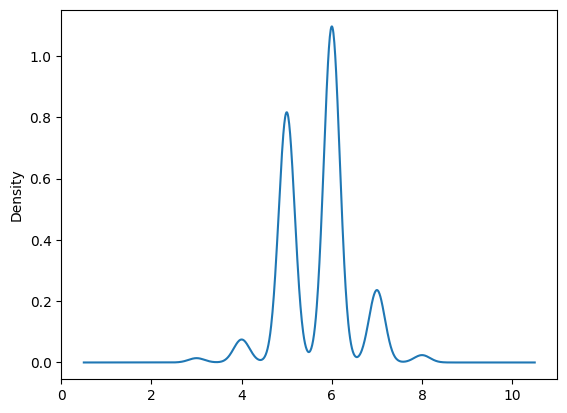

In [ ]:
df['Signal_Strength'].plot(kind='kde')
plt.show()

In [ ]:
df['Signal_Strength'].value_counts()

6.0    775
5.0    577
7.0    167
4.0     53
8.0     17
3.0     10
Name: Signal_Strength, dtype: int64

In [ ]:
sns.pairplot(df,hue='Signal_Strength',diag_kind = 'kde')

Output hidden; open in https://colab.research.google.com to view.

##1E

* The data has duplicates
* The target variable doesnt have enough values to support some signal strengths
* the clusters are overlapping

#2

##2A,2B,2C,2D


In [ ]:
scaler = StandardScaler()

In [ ]:
df.iloc[:,:-1] = scaler.fit_transform(df.iloc[:,:-1])
df.sample(5)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
949,-0.217094,-0.047745,-0.058149,-0.219609,-0.169972,-0.166723,-0.242371,-0.004415,0.001269,-0.208349,-0.197320,6.0
472,2.644579,-0.936850,1.550698,0.099986,-0.082292,0.972991,0.726952,1.621289,-1.118583,1.058381,0.002552,6.0
57,-0.465935,0.604265,-0.834834,2.097452,0.531467,3.563248,2.084003,0.924559,-0.348685,0.741698,-0.996809,5.0
853,0.653850,-0.996123,0.663058,-0.778900,-0.148052,2.630756,0.306912,-0.108925,1.121122,0.488352,0.502233,6.0
387,0.031747,0.782086,-0.668401,-0.459305,-0.169972,0.144108,-0.113128,0.285889,0.001269,-0.715041,-0.796937,6.0


In [ ]:
df.shape

(1599, 12)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size = 0.3,random_state=4320)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(1119, 11) (480, 11) (1119,) (480,)


In [ ]:
tf.random.set_seed(4320)

In [ ]:
ytrain.value_counts()

6.0    542
5.0    410
7.0    110
4.0     40
8.0     10
3.0      7
Name: Signal_Strength, dtype: int64

In [ ]:
ytest.value_counts()

6.0    233
5.0    167
7.0     57
4.0     13
8.0      7
3.0      3
Name: Signal_Strength, dtype: int64

##2E

In [ ]:
ytrain = tf.keras.utils.to_categorical(ytrain,num_classes=10)
ytest = tf.keras.utils.to_categorical(ytest,num_classes=10)

In [ ]:
xtrain.shape

(1119, 11)

In [ ]:
1119//20

55

In [ ]:
50*35

1750

#3
##3A

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.Input(shape=(11,)))
model1.add(tf.keras.layers.BatchNormalization())
model1.add(tf.keras.layers.Dense(200,activation = 'sigmoid'))
model1.add(tf.keras.layers.Dense(150,activation = 'sigmoid'))
model1.add(tf.keras.layers.Dropout(.2))
model1.add(tf.keras.layers.Dense(125,activation = 'sigmoid'))
model1.add(tf.keras.layers.Dense(75,activation = 'sigmoid'))
model1.add(tf.keras.layers.Dropout(.4))
model1.add(tf.keras.layers.Dense(50,activation = 'sigmoid'))
model1.add(tf.keras.layers.Dense(25,activation = 'sigmoid'))
model1.add(tf.keras.layers.Dense(10,activation = 'softmax'))

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.5),loss = 'categorical_crossentropy',metrics='accuracy')

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 11)               44        
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 200)               2400      
                                                                 
 dense_13 (Dense)            (None, 150)               30150     
                                                                 
 dropout_3 (Dropout)         (None, 150)               0         
                                                                 
 dense_14 (Dense)            (None, 125)               18875     
                                                                 
 dense_15 (Dense)            (None, 75)                9450      
                                                      

In [ ]:
history1 = model1.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs = 100,batch_size = 20)

Epoch 1/100
56/56 [==============================] - 0s 5ms/step - loss: 1.1489 - accuracy: 0.4772 - val_loss: 1.1690 - val_accuracy: 0.4854
Epoch 2/100
56/56 [==============================] - 0s 5ms/step - loss: 1.1486 - accuracy: 0.4781 - val_loss: 1.1707 - val_accuracy: 0.4854
Epoch 3/100
56/56 [==============================] - 0s 5ms/step - loss: 1.1522 - accuracy: 0.4826 - val_loss: 1.1743 - val_accuracy: 0.4854
Epoch 4/100
56/56 [==============================] - 0s 5ms/step - loss: 1.1455 - accuracy: 0.4799 - val_loss: 1.1720 - val_accuracy: 0.4854
Epoch 5/100
56/56 [==============================] - 0s 5ms/step - loss: 1.1488 - accuracy: 0.4710 - val_loss: 1.1774 - val_accuracy: 0.4854
Epoch 6/100
56/56 [==============================] - 0s 4ms/step - loss: 1.1490 - accuracy: 0.4763 - val_loss: 1.1660 - val_accuracy: 0.4854
Epoch 7/100
56/56 [==============================] - 0s 4ms/step - loss: 1.1459 - accuracy: 0.4745 - val_loss: 1.1695 - val_accuracy: 0.4854
Epoch 8/100
5

In [ ]:
history1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

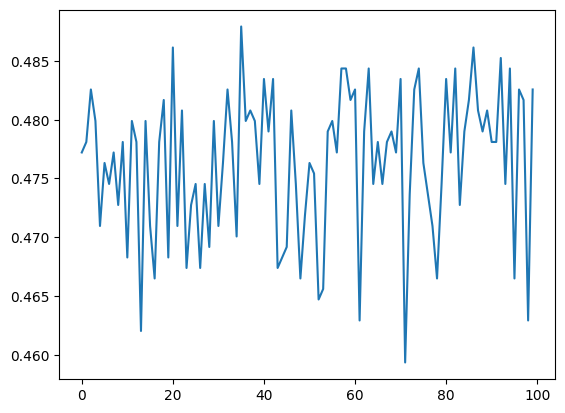

In [ ]:
plt.plot(history1.history['accuracy'])
plt.show()

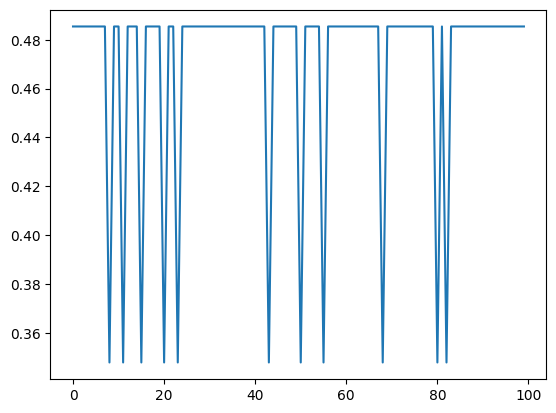

In [ ]:
plt.plot(history.history['val_accuracy'])

##3D

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(11,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(200,activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(150,activation = 'sigmoid'))
model.add(tf.keras.layers.Dropout(.4))
model.add(tf.keras.layers.Dense(75,activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(25,activation = 'sigmoid'))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1.5),loss = 'categorical_crossentropy',metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 11)               44        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 200)               2400      
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 75)                11325     
                                                                 
 dense_3 (Dense)             (None, 25)                1900      
                                                        

In [ ]:
history = model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs = 100,batch_size = 20)

Epoch 1/100
56/56 [==============================] - 2s 21ms/step - loss: 1.3198 - accuracy: 0.4245 - val_loss: 1.1828 - val_accuracy: 0.4854
Epoch 2/100
56/56 [==============================] - 0s 7ms/step - loss: 1.2003 - accuracy: 0.4298 - val_loss: 1.1776 - val_accuracy: 0.4854
Epoch 3/100
56/56 [==============================] - 0s 7ms/step - loss: 1.1925 - accuracy: 0.4370 - val_loss: 1.2132 - val_accuracy: 0.4854
Epoch 4/100
56/56 [==============================] - 0s 4ms/step - loss: 1.1661 - accuracy: 0.4799 - val_loss: 1.2000 - val_accuracy: 0.4854
Epoch 5/100
56/56 [==============================] - 0s 4ms/step - loss: 1.1693 - accuracy: 0.4692 - val_loss: 1.2290 - val_accuracy: 0.4854
Epoch 6/100
56/56 [==============================] - 0s 4ms/step - loss: 1.1669 - accuracy: 0.4540 - val_loss: 1.1710 - val_accuracy: 0.4854
Epoch 7/100
56/56 [==============================] - 0s 4ms/step - loss: 1.1571 - accuracy: 0.4620 - val_loss: 1.1929 - val_accuracy: 0.4854
Epoch 8/100


##3E

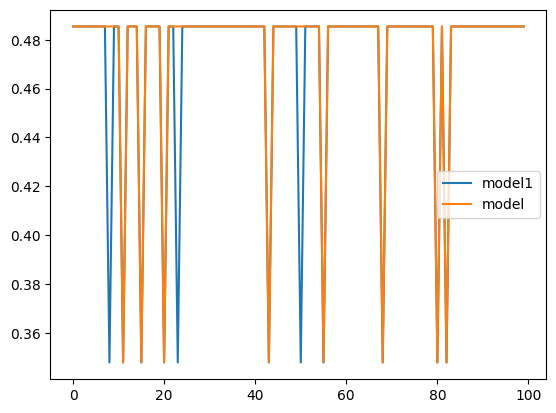

In [ ]:
plt.plot(history.history['val_accuracy'],label = 'model2_val_accuracy')
plt.plot(history1.history['val_accuracy'],label = 'model1_accuracy')
plt.legend(['model1','model'])
plt.show()

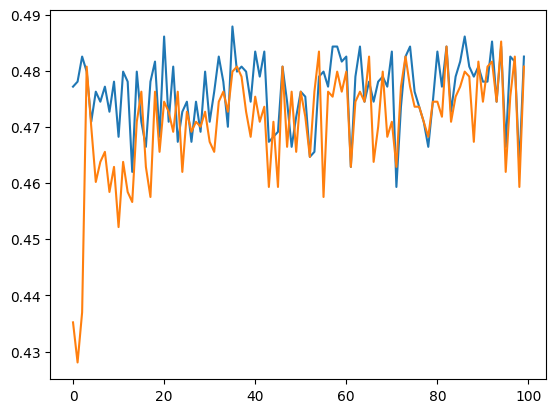

In [ ]:
plt.plot(history1.history['accuracy'],label = 'model1_accuracy')
plt.plot(history.history['accuracy'],label = 'model2_accuracy')

* both the models have similar behaviour despite the number of layers, neurons and learning rate
* with more epochs the model might get more accurate in prediction.

In [ ]:
%%shell
jupyter nbconvert --to html //'/content/drive/MyDrive/AI-ML/Neural Networks/Mini Project/NN MiniProject A.ipynb'

[NbConvertApp] Converting notebook ///content/drive/MyDrive/AI-ML/Neural Networks/Mini Project/NN MiniProject A.ipynb to html
[NbConvertApp] Writing 954755 bytes to /content/drive/MyDrive/AI-ML/Neural Networks/Mini Project/NN MiniProject A.html
